In [1]:
import pandas as pd
import numpy as np

# USING IMPORT EMAILS TO PARSE THORUGH MESSAGES
import email
from email.parser import Parser

import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
from time import strftime
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Intensity Score (sentiment score)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Polarity / Subjectivity scores
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('01-clean_data.csv', index_col=False)

df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,NaN,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [3]:
df[['content', 'date', 'sender', 'subject']].head()

,content,date,sender,subject
0,Here is our forecast\n\n,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN
1,Traveling to have a business meeting takes the...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:
2,test successful. way to go!!!,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test
3,"Randy,\n\n Can you send me a schedule of the s...","Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN
4,Let's shoot for Tuesday at 11:45.,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello


In [4]:
# df.to_csv('01-clean_data.csv', index = False)

In [5]:
df.shape

(517401, 14)

In [6]:
df.fillna('', inplace = True)

In [7]:
df.isna().sum()

file            0
subject         0
sender          0
date            0
content         0
clean           0
tokenize        0
stop_words      0
lemmatize       0
intensity       0
polarity        0
subjectivity    0
is_poi          0
is_internal     0
dtype: int64

In [8]:
df.clean[151719]

'    '

In [9]:
ts = pd.read_csv('02-ts_data.csv')

ts.shape

(517401, 6)

In [10]:
ts.head()

,date,intensity,polarity,subjectivity,year,month
0,1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1,1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
2,1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
3,1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
4,1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [11]:
ts.date = pd.to_datetime(ts.date)

In [12]:
ts.set_index('date', inplace = True)

In [13]:
ts.isna().sum()

intensity       0
polarity        0
subjectivity    0
year            0
month           0
dtype: int64

<AxesSubplot:xlabel='date'>

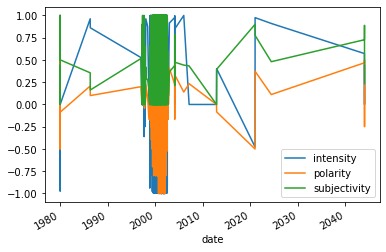

In [14]:
ts.drop(columns = ['month', 'year']).plot()

In [15]:
ts.index.dtype

datetime64[ns, UTC]

In [16]:
ts.index[0]

Timestamp('1980-01-01 00:00:00+0000', tz='UTC')

<Figure size 720x720 with 0 Axes>

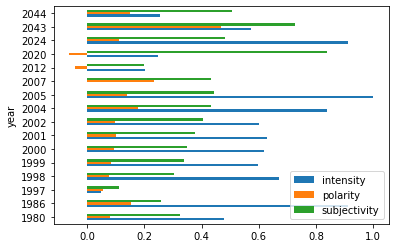

In [17]:
plt.figure(figsize = (10, 10))
ts.groupby('year')[['intensity', 'polarity', 'subjectivity']].mean().sort_index().plot.barh()
plt.show()

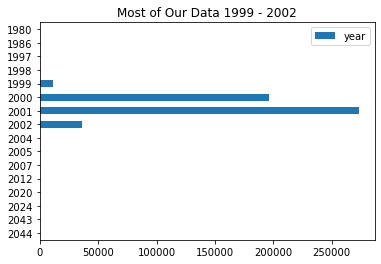

In [18]:
pd.DataFrame(ts.year.value_counts()).sort_index(ascending = False).plot.barh()
plt.title('Most of Our Data 1999 - 2002')
plt.show()

In [19]:
pd.DataFrame(round(ts.year.value_counts(normalize = True)*100, 4)).sort_index()

,year
1980,0.1009
1986,0.0004
1997,0.0845
1998,0.0342
1999,2.1538
2000,37.9010
2001,52.7568
2002,6.9528
2004,0.0135
2005,0.0002


<AxesSubplot:>

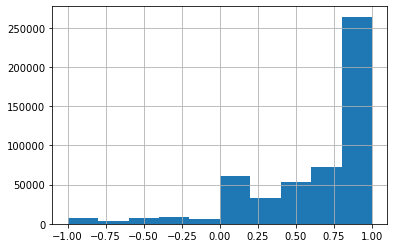

In [20]:
ts.intensity.hist()

In [21]:
ts.head()

,intensity,polarity,subjectivity,year,month
date,,,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [22]:
df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [23]:
df['year'] = ts.year.reset_index()['year']

df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal,year
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True,1980
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,1980
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True,1980
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,1980
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,1980


In [24]:
df[df.is_poi == True].intensity.mean()

0.6436271374798389

In [25]:
def avg_score(df, filter_, measure):
    '''
    
    '''
    
    avg_score = df[filter_][measure].mean()
    
    return avg_score

In [26]:
avg_score(df, df.is_poi == True, 'intensity')

0.6436271374798389

In [27]:
avg_score(df, df.is_poi == False, 'intensity')

0.6207405031438705

In [28]:
avg_score(df, (df.is_poi == True) & (df.year == 2001), 'intensity')

0.6957893805309738

In [29]:
avg_score(df, (df.is_poi == False) & (df.year == 2001), 'intensity')

0.6290278269500146

In [30]:
avg_score(df, (df.is_poi == True) & (df.year == 2000), 'intensity')

0.6352135014505709

In [31]:
avgs = df.groupby('year').mean()
# avgs = avgs[(avgs.index < 2003) & (avgs.index > 1998)]
avgs = avgs[avgs.index < 2005]
avgs

,intensity,polarity,subjectivity,is_poi,is_internal
year,,,,,
1980,0.432761,0.071073,0.313493,0.000000,1.000000
1986,0.769950,0.008604,0.554221,0.000000,1.000000
1997,0.466810,0.094747,0.321183,0.000000,0.938215
1998,0.445516,0.049697,0.320582,0.005650,0.988701
1999,0.549134,0.075272,0.361843,0.002423,0.856156
2000,0.620058,0.097021,0.361762,0.022851,0.815574
2001,0.629249,0.098973,0.371411,0.003312,0.833982
2002,0.591121,0.096951,0.373393,0.004614,0.819286
2004,0.624813,0.083468,0.414091,0.000000,1.000000


In [32]:
cols = avgs.columns[0:3]
cols

Index(['intensity', 'polarity', 'subjectivity'], dtype='object')

In [33]:
labs = cols.values.tolist()
labs

['intensity', 'polarity', 'subjectivity']

In [34]:
x = avgs.index.values.tolist()
x

[1980, 1986, 1997, 1998, 1999, 2000, 2001, 2002, 2004]

In [35]:
y_intensity = avgs[cols[0]].values.tolist()
y_intensity

[0.4327609195402304,
 0.76995,
 0.4668102974828374,
 0.445515819209039,
 0.5491337311557882,
 0.6200577072921764,
 0.6292489273311561,
 0.5911214794017995,
 0.6248128571428573]

In [36]:
y_polarity = avgs[cols[1]].values.tolist()
y_polarity

[0.07107277255949893,
 0.0086038961038961,
 0.09474675453516088,
 0.04969733833614939,
 0.07527206192534155,
 0.09702054485354027,
 0.09897333197256485,
 0.09695062139534871,
 0.0834682408387137]

In [37]:
y_subjectivity = avgs[cols[2]].values.tolist()
y_subjectivity

[0.31349268372320555,
 0.5542207792207792,
 0.3211830243113354,
 0.3205815876883929,
 0.36184275873087013,
 0.3617617791463612,
 0.3714107587485667,
 0.37339310437933315,
 0.41409092360616234]

([<matplotlib.axis.XTick at 0x7f9d907ee7c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

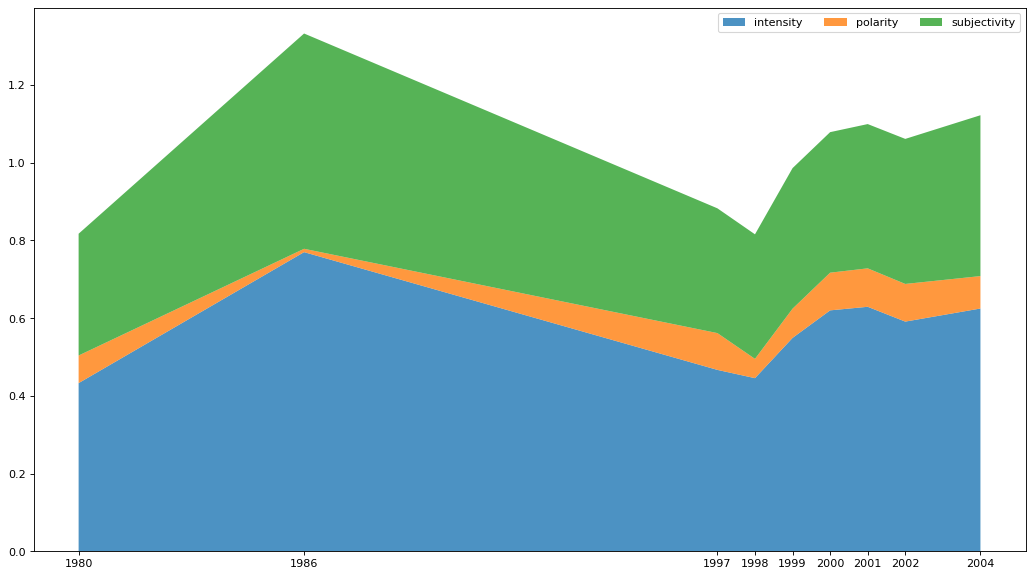

In [38]:
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)

y = np.vstack([y_intensity, y_polarity, y_subjectivity])
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)
ax.legend(fontsize=10, ncol=4)
plt.xticks(x, fontsize=10, horizontalalignment='center')


In [39]:
avgs.index.reset

AttributeError: 'Int64Index' object has no attribute 'reset'

In [ ]:
sns.relplot(x="year", y="intensity", data=avgs.reset_index(), kind = 'line')

In [ ]:
df.head(2)

In [ ]:
sns.relplot(data = df[df.year < 2005], x = 'year', y = 'intensity', kind = 'line')

In [ ]:
sns.relplot(data = df[df.year < 2005], x = 'year', y = 'intensity', kind = 'line', hue = 'is_poi')

In [ ]:
df[df.is_poi == True].year.value_counts().sort_index()

In [ ]:
df[df.is_poi == True].year.value_counts().sort_index().plot.bar()

In [ ]:
df[df.is_poi == True].year.value_counts().sort_index().plot.barh()

In [ ]:
df[(df.year >= 1998) & (df.year <= 2002)].year.value_counts().sort_index().plot.bar()

In [ ]:
years = list(df[(df.year >= 1998) & (df.year <= 2002)].year.unique())
years

In [ ]:
df['year_'] = df.year.astype(str)

In [ ]:
g = sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'intensity', \
            kind = 'line', hue = 'is_poi', ci = None)

In [ ]:
g = sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'polarity', \
            kind = 'line', hue = 'is_poi', ci = None)

In [ ]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.2)

sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'intensity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((-1, 1))
plt.show()

In [ ]:
sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'polarity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((-1, 1))
plt.show()

In [ ]:
sns.relplot(data = df[(df.year >= 1998) & (df.year <= 2002)], x = 'year_', y = 'subjectivity', \
            kind = 'line', hue = 'is_poi', ci = None, palette = ['#999999ff', '#912a15ff'])
plt.legend(loc='lower right', title = 'POI', labels = ['Not Person of Interest', 'Person of Interest'])
plt.ylim((0, 1))
plt.show()

In [ ]:
from scipy import stats


def correlation_exploration(df, x_string, y_string):
    '''
    This nifty function takes in a df, a string for x variable,
    and a string for y variable and displays their correlation.
    '''
    r, p = stats.pearsonr(df[x_string], df[y_string])
    
    df.plot.scatter(x_string, y_string, color = '#999999ff')
    sns.regplot(data = df, x= x_string, y= y_string)
    plt.title(f"{x_string.upper()}'s Relationship with {y_string.upper()}\n\n")
    
    print(f'The Correlation Coefficient is: {round(r, 2)}. There is {round(p,3)}% chance that we see these results by chance.')
#     print(f'r = {round(r, 2)}')

    plt.show()

In [ ]:
correlation_exploration(df, 'year', 'intensity')

In [ ]:
correlation_exploration(df, 'year', 'polarity')

In [ ]:
correlation_exploration(df, 'year', 'subjectivity')

In [ ]:
corr_table =  df[['year', 'intensity', 'polarity', 'subjectivity', 'is_poi']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Greys', annot=True, linewidth=0.5, mask= np.triu(corr_table), vmin = -1, vmax = 1)
plt.title('Very Little Correlation Between Sentiment Scores and Year or POI')
plt.show()

In [ ]:
df.year.value_counts().sort_index()

In [ ]:
df[df.year == 1986]

In [ ]:
df.content[522]

In [ ]:
df.groupby('sender').mean().sort_values(by = 'intensity')

In [ ]:
df[df.sender == 'ihrke@mindspring.com']

In [ ]:
print(df.content[371691])

In [ ]:
poi = ['andrew.fastow@enron.com',
    'richard.causey@enron.com',
    'rick.buy@enron.com',
    'ben.glisan@enron.com',
    'mary.joyce@enron.com',
    'jeff.skilling@enron.com',
    'jeffreyskilling@yahoo.com',
    'ronniechan@hanglung.com',
    'jhduncan@aol.com',
    'wgramm@aol.com',
    'wgramm@gmu.edu',
    'kenneth.lay@enron.com',
    'ken.lay-@enron.com',
    'ken.lay@enron.com',
    'ken.lay-.chairman.of.the.board@enron.com',
    'kevin_a_howard.enronxgate.enron@enron.net',
    'michael.krautz@enron.com',
    'rex.shelby@enron.com',
    'rex_shelby@enron.net',
    'james.brown@enron.com',
    'christopher.calger@enron.com',
    'tim.despain@enron.com',
    'kevin.hannon@enron.com',
    'mark.koenig@enron.com',
    'john.forney@enron.com',
    'ken.rice@enron.com',
    'ken_rice@enron.net',
    'paula.rieker@enron.com',
    'david.delainey@enron.com',
    'dave.delainey@enron.com',
    'jeff.richter@enron.com',
    'tim.belden@enron.com',
    'raymond.bowen@enron.com',
    'wes.colwell@enron.com',
    'dan.boyle@enron.com']

In [ ]:
pd.DataFrame(poi)

In [ ]:
import wrangle
# createn dataframes for poi==true for 2000 and 2001
df_2000, df_2001 = wrangle.create_topic_dataframes(df)

In [ ]:
# pd.to_datetime(df.date.head())

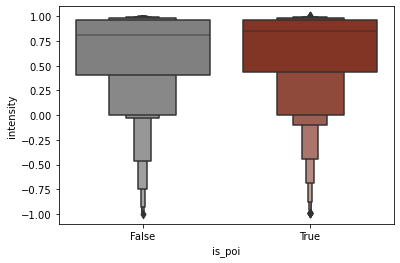

In [41]:
sns.boxenplot(data = df, x = 'is_poi', y = 'intensity', palette = ['grey', '#912a15'])
plt.title('')
plt.show()

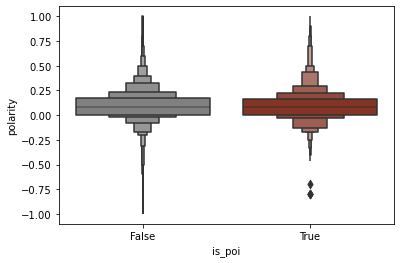

In [42]:
sns.boxenplot(data = df, x = 'is_poi', y = 'polarity', palette = ['grey', '#912a15'])
plt.title('')
plt.show()

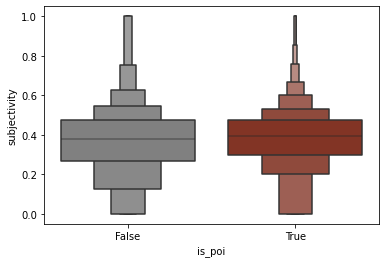

In [43]:
sns.boxenplot(data = df, x = 'is_poi', y = 'subjectivity', palette = ['grey', '#912a15'])
plt.title('')
plt.show()